  0%|          | 0/1000000 [00:00<?, ?it/s]

Nós: ['A', 'B', 'C']
Arestas: []


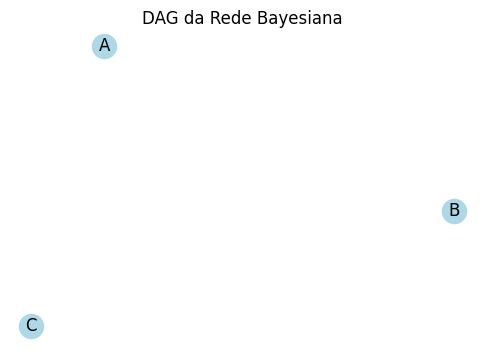


Consulta marginal de C:
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.5100 |
+------+----------+
| C(1) |   0.4900 |
+------+----------+


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BDeuScore, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

# Gera um dataset de exemplo simples (categorias 0/1)
data = pd.DataFrame({
    "A": np.random.choice([0, 1], size=1000),
    "B": np.random.choice([0, 1], size=1000),
    "C": np.random.choice([0, 1], size=1000),
})

# Aprender estrutura
hc = HillClimbSearch(data)
best_model = hc.estimate(scoring_method=BDeuScore(data))

# Criar modelo
model = BayesianNetwork(best_model.edges())

# Adicionar nós ausentes (por exemplo, nós isolados)
model.add_nodes_from(data.columns)

# Ajustar CPDs
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Visualizar nós e arestas
print("Nós:", model.nodes())
print("Arestas:", model.edges())

# Plotar
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(model, seed=42)
nx.draw_networkx(model, pos, node_color='lightblue', arrows=True, arrowstyle='->')
plt.title("DAG da Rede Bayesiana")
plt.axis('off')
plt.show()

# Inferência
inference = VariableElimination(model)
print("\nConsulta marginal de C:")
print(inference.query(variables=["C"]))